### Introduction to regression with neural networks in Tensorflow
There are many definitions for a regression problem
but in our case, we're going to simplify it: predicting a Numerical variable
based on some combination of variables, even shorter...predicting a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)


2.8.2


### Create data to view and fit

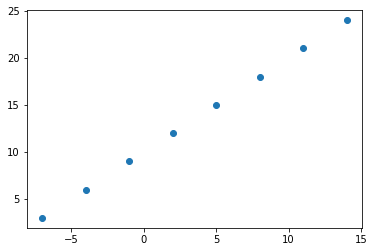

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it with a plotb
plt.scatter(X, y)

In [3]:
# This is the relationship between our independant variable and dependant variable.
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes important 

In [4]:
# Create a demo tensor for our Housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Change the dtype to tf.float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

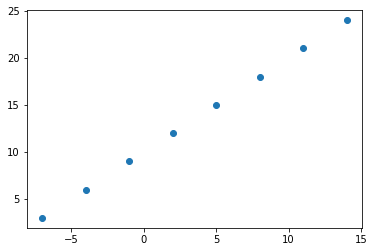

In [11]:
plt.scatter(X, y)

### Steps in modeling with TensorFlow
1. ***Creating a model*** and the find the input and output layers, as well as the hidden layers of
    a deep learning model.

2. ***Compiling a model*** - define the loss function (in other words, the function 
    which tells our model how wrong it is) and the optimizer (tells are model how to improve 
    the patterns it's learning) and  evaluation metrics (What we can use to interpret 
    the Performance of our model.)
    
3. ***Fitting a model*** – leading the model try to find patterns between X & y (features and labels)

In [13]:
# Set random seed
tf.random.set_seed(42)

# First Neural model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])
# 3. Fit the model, epochs is the number of times it goes through the data
model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
# Check out X and y
X, y


In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

In [ ]:
y_pred = model.predict([17.0])
y_pred

In [ ]:
y_pred + 11

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, 
increase the number of hidden units (all called neurons) within each of the hidden layers, 
change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model with more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sdg is short for stochasitc gradient descent 
              metrics=["mae"])

# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# Remind ourselves of the data
X, y

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])


In [16]:
# Practice creating a model, homework if you will

# 1. Create the model, the "Dense" number is the number of hidden units e.g. Dense(100)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])
# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
X, y

In [ ]:
model.predict([17])

### Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->
tweak a model -> fit it -> evaluate it

In [ ]:
# When it come to evaluation there are 3 words to remember:
# Visualize, Visualize, Visualize
# It's good to visualize the data what data are we working with what does it look like
# Visualize the model itself - what does our model look like?
# the training of the model - how does a model perform while it learns?
# The predictions of a model – how does the predictions of a model lineup against,
# the ground truth (the original labels).

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

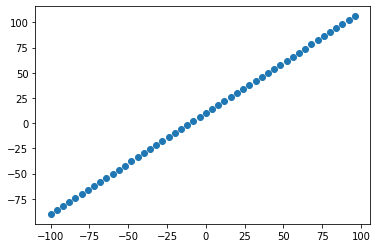

In [19]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available, This is like the course materials for a class e.g. book for the class

* Validation set - the model gets tuned on this data, which is typically 10-15% od the data available this is like the practice exam for a course for class

* Test set - the model get evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available this is like the final exam for a course or class.

In [20]:
# Check the length of the number of samples we have
len(X)

50

In [58]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]


X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now that we've got our data in training and test sets… let's visualize it again!

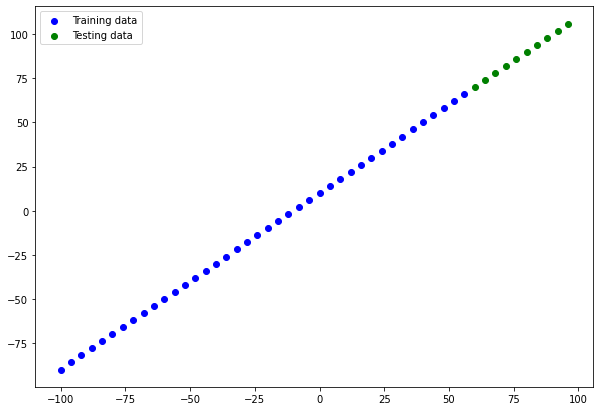

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to 
                                                         # predict this (given X, what's y?)
# Show a legend
plt.legend();

# Visualizing your data makes it easier to understand than looking at a python list of numbers

In [63]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [24]:
model.summary()

ValueError: ignored

In [25]:
X[0].shape

TensorShape([])

In [49]:
# Let's create a model which builds automatically by defining the input underscore shape
# argument in the first layer.

tf.random.set_seed(42)

# Create a model like before, and add a name to the layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit the model


In [50]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated During training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** for more in-depth overview of the Trainable parameters within a layer, check out
     MIT's Introduction to deep learning video.
     
**Execise** Try playing around the number of hidden units in the Dense layer

In [64]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

ValueError: ignored

In [52]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


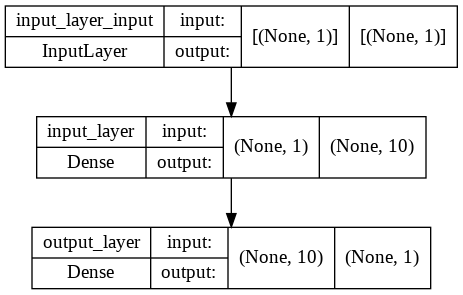

In [53]:
# Visualizing our model with the below
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model's predictions)

In [54]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [55]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [67]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

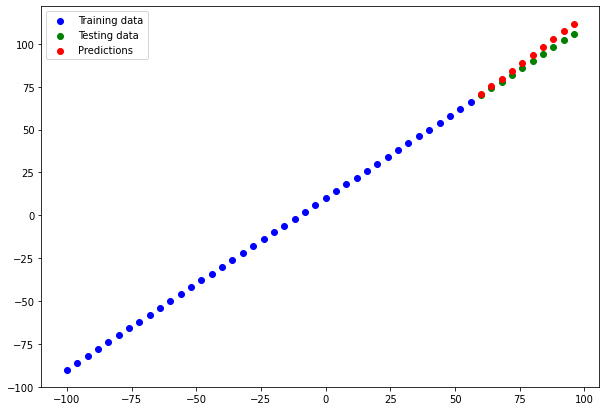

In [69]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics. 

Depending on the problem I'm working on, there will be different evaluation metrics to evaluate my model's performance.

Since I'm working on a regression problem, two of the main metrics that I'll see are:

* MAE - mean absolute error, "On average, how wrong is each of the model's predictions."

* MSE - mean square error, "square the average errors"

In [ ]:
# Start 6:14:49 into the video